# Medium Articles Recommender System - Non-Negative Matrix Factorization
Submitted to: Zahy Aziz (Big Data Tools)

                                            Submitted by:
                                            Anil Poudel(C0900334)
                                            Anil Shrestha(C0899934)
                                            Aruna Gurung (C0896129)
                                            Bhawana Pathak (C0899371)
                                            Gupta Bahadur Bhandari(C0899873)
                                            Sabuz Rana(C0899377)
                                            Suresh Mahat(C0900890)


## Introduction:
To build a recommendation system for Medium articles, we plan to use Non-Negative Matrix Factorization technique to group together articles that share similar topics. <br/>
NMF: ML techniques used for dimensionality reduction and feature extraction in the field of linear algebra and data analysis. It is commonly used in data preprocessing, image processing, text mining and other application where underlying data can be represented as non-negative values.<br/>

Before using NMF to build the ***Recommender System***, we have to perform some ***Natural Language Processing*** steps such as vectorizing data using TF-IDF. Also, we have perform ***Exploratory Data Analysis*** before diving into applying machine learning.<br/>
Finally, we sort the results based on number of claps (likes), because we want to recommend to readers good articles in the same topic that they are currently reading/interested in.<br/>
NLP particularly used for text analysis and topic modeling.<br/>
TF-IDF(Term Frequency-Inverse Document Frequency): Numeric representation of the word within a collection of documnet in the field of information retrieval and text mining.


### Plan
1. Exploratory Data Analysis and Data visualization
2.Feature Engineering and Data Pre-Processing
3. Recommending System Building
4. Testing  the system




### Data and Library importing

In [124]:
# Basic Data Libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# RegEx
import re

# Pre processing and NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

In [125]:
# changes the default size of the figures to have a width of 8 inches and a height of 6 inches
plt.rcParams['figure.figsize'] = (8,6)

In [126]:
my_data = pd.read_csv("/content/medium_data.csv")
my_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [127]:
my_data.iloc[1003].title

'<strong class="markup--strong markup--h3-strong">If You Learn to Write, You Can Change Your\xa0Life.</strong>'

In [128]:
my_data.loc[1000:1005].title

1000          6 lessons I learned as a freelance designer
1001    <strong class="markup--strong markup--h3-stron...
1002             Why sketching can be your unicorn skill.
1003    <strong class="markup--strong markup--h3-stron...
1004    The Power of Letting Go: How Surrendering Cont...
1005    How to Use the useReducer React Hook to Share ...
Name: title, dtype: object

## Exploratory Data Analysis and Data Visualization

Sanity check using info method, to see if the data has any missing values and/or wrong data types:

In [129]:
#showing dataframe information
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


In [130]:
#counting the number of missing null values in dataframe
my_data.isnull().sum()

id                 0
url                0
title              0
subtitle        3029
image            147
claps              0
responses          0
reading_time       0
publication        0
date               0
dtype: int64

#### Data types
**responses:** This column needs to be an integer, after a quick check, we found that the column contains a "Read" value, which needs to be dropped. <br/>
**date:** we do not plan to use date column, but it might be an option in the future to recommend only most recent articles, so we will be fixing this data type.
#### Missing values
We can see that subtitle column has multiple missing values, which we will be treating in the pre processing section. Finally, image column has missing values too, but we won't be using to whatsoever, so it is okay to just drop it.

In [131]:
#returning unique value of response column of dataframe
my_data["responses"].unique()

array(['8', '11', '1', '0', '3', '2', '60', '27', '58', '13', '6', '15',
       '5', '4', '19', '10', '9', '7', '16', '76', '33', '21', '28', '14',
       '24', '17', '78', '30', '12', '74', '50', '18', '22', '48', '26',
       '20', '35', '51', '25', '62', '53', '120', '41', 'Read', '34',
       '86', '82', '63', '46', '170', '45', '23', '32', '29', '52', '117'],
      dtype=object)

In [132]:
#filtering the dataframe whose response is Read
my_data[my_data["responses"]=="Read"]

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
3977,3978,https://medium.com/datadriveninvestor/what-do-...,What do you think of the Open Group’s Data Sci...,NaN,3978.jpg,73,Read,3,Data Driven Investor,2019-05-24
6392,6393,https://uxdesign.cc/please-please-please-tell-...,"UX doesn’t discriminate, it targets behaviours",NaN,NaN,74,Read,5,UX Collective,2019-12-05


In [133]:
#describing the dataframe including object datatype
#Transposing the dataframe resulting from describe
# applying background gradient to the "count" row, with the color map (or cmap) set to Greens (lower values) to dark blues (higher values)
my_data.describe(include=object).T.style.background_gradient(subset=["count"], cmap="GnBu")

,count,unique,top,freq
url,6508,6508,https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92,1
title,6508,6504,Lost in translation,2
subtitle,3479,3470,"A weekly selection of design links, brought to you by your friends at the UX Collective.",5
image,6361,6361,1.png,1
responses,6508,56,0,3396
publication,6508,7,The Startup,3041
date,6508,50,2019-10-21,197


 We see that "The Startup" is the most frequent publication in our dataset, 21st of octobre 2019 had the most number of articles. We can also see that 52% of articles did not have any reponses.

In [134]:
#describing the dataframe including int datatype
#Transpose the dataframe resulting from describe
# applying background gradient to the every rowss, with the color map (or cmap) set to light purples (lower values) to dark blues (higher values)
my_data.describe().T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,6508.000000,3254.500000,1878.842108,1.000000,1627.750000,3254.500000,4881.250000,6508.000000
claps,6508.000000,311.076060,950.789896,0.000000,54.000000,115.000000,268.250000,38000.000000
reading_time,6508.000000,6.134911,3.231918,0.000000,4.000000,5.000000,7.000000,55.000000


From the above summary statistics, we can see that the average reading time is 6 minutes, while we can find an article that has a reading time of 55 minutes!. From the mean and median, it looks like the reading time column is normally distributed, but is it? Let's check for distribution type using Emperical Cumulative Distribution Function (ECDF). <br/>
ECDF: It is a non-parametric method used to plot the cumulative distribution of data points. The ECDF essentially gives you the proportion or count of data points falling below each unique value in a dataset. Compared to a histogram or density plot, it has the advantage that each observation is visualized directly, meaning that there are no binning or smoothing parameters that need to be adjusted.<br/>

**PS:** We can use ecdfplot of seaborn instead of creating a manual visualization.

In [135]:
def ecdf(my_data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(my_data)

    # x-data for the ECDF: x
    x = np.sort(my_data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

What we usually do is plot ecdf of our column, alongside a a theoritcal distribution using statistics of our column. In this example we will test if our data is normally distributed first, so we will use theoritcal sample using the mean and standard deviation of reading time column, and compare it to our ecdf.

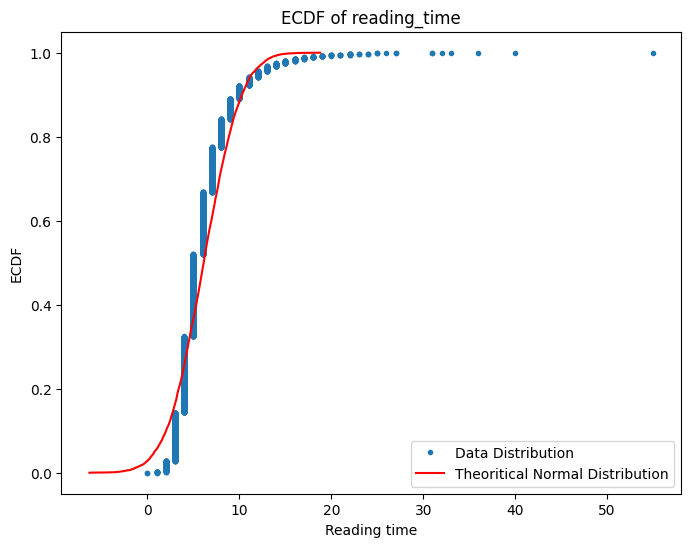

In [136]:
sample = np.random.normal(my_data["reading_time"].mean(), my_data["reading_time"].std(), size=10000)

x, y = ecdf(my_data["reading_time"])
x_theor, y_theor = ecdf(sample)

plt.plot(x, y, marker=".", linestyle="none", label="Data Distribution")
plt.plot(x_theor, y_theor, color="red", label="Theoritical Normal Distribution")

plt.xlabel("Reading time")
plt.ylabel("ECDF")
plt.title("ECDF of reading_time")
plt.legend()

plt.show()

Another way to check if data is normally distributed, is performing Shapiro-Wilk test. We can perform the test using shapiro function of scipy.stats module

In [137]:
from scipy.stats import shapiro
shapiro(my_data["reading_time"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8009546399116516, pvalue=0.0)

From the plot we can tell that the data is not normally distributed, and the shapiro-wilk test approved our hypothesis since the p-value is 0.73 which is less than the threshold 0.05 (5%) then we fail to reject the null hypothesis. We do not have sufficient evidence to say that sample does come from a normal distribution.

Before testing other distributions, lets visualize histogram of the data:

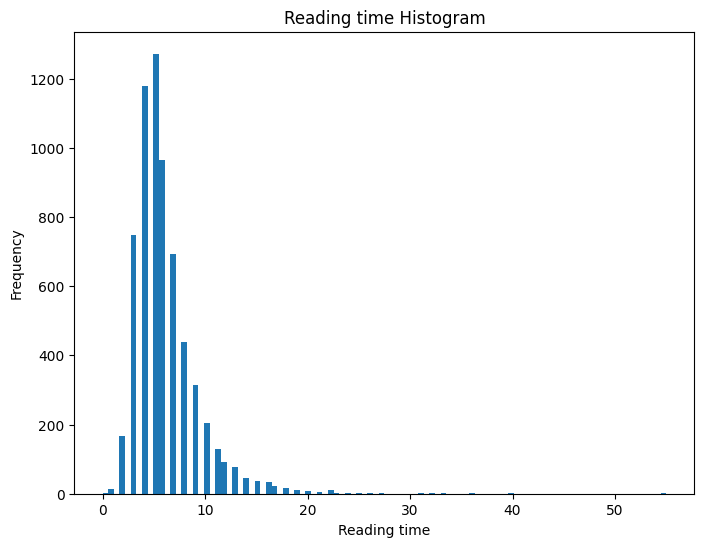

In [138]:
plt.hist(my_data["reading_time"], bins=100, stacked=True)

plt.title("Reading time Histogram")
plt.xlabel("Reading time")
plt.ylabel("Frequency")
plt.show()

First of all, data is obviously not normally distributed, also from the histogram we can see that reading time is a discrete variable. For that reason, We will test poisson distribution.

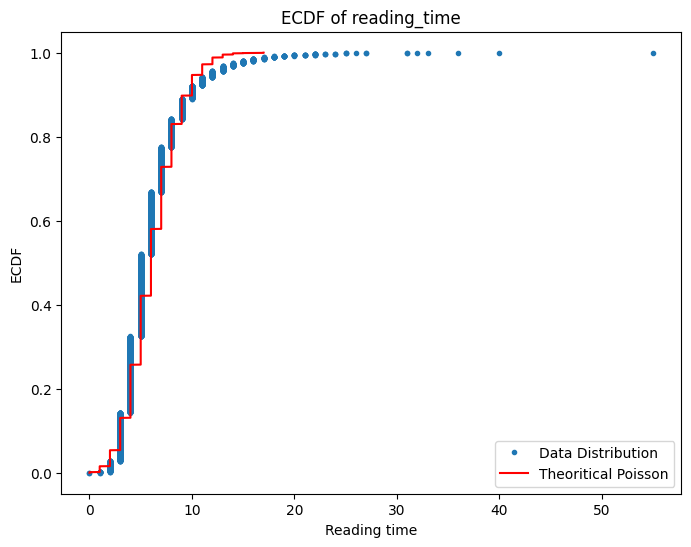

In [139]:
poisson = np.random.poisson(my_data["reading_time"].mean(), size=6000)

x_theor_po, y_theor_po = ecdf(poisson)

plt.plot(x, y, marker=".", linestyle="none", label="Data Distribution")
plt.plot(x_theor_po, y_theor_po, color="red", label="Theoritical Poisson")

plt.xlabel("Reading time")
plt.ylabel("ECDF")
plt.title("ECDF of reading_time")
plt.legend()

plt.show()

We can conclude that reading_time is poisson distributed.

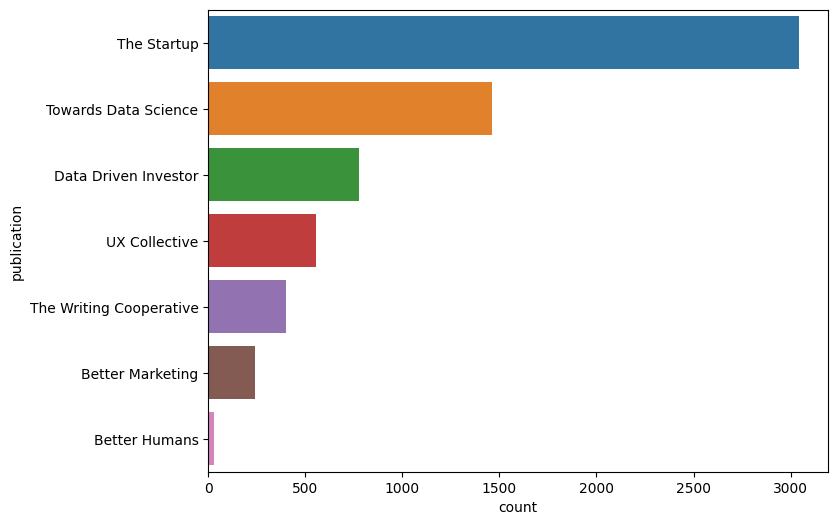

In [140]:
sns.countplot(y="publication", data=my_data, order=my_data['publication'].value_counts().index)
plt.show()

***The Startup*** is the publication most frequent in our data, followed by ***Towards Data Science.***

How does reading time vary in each publication?

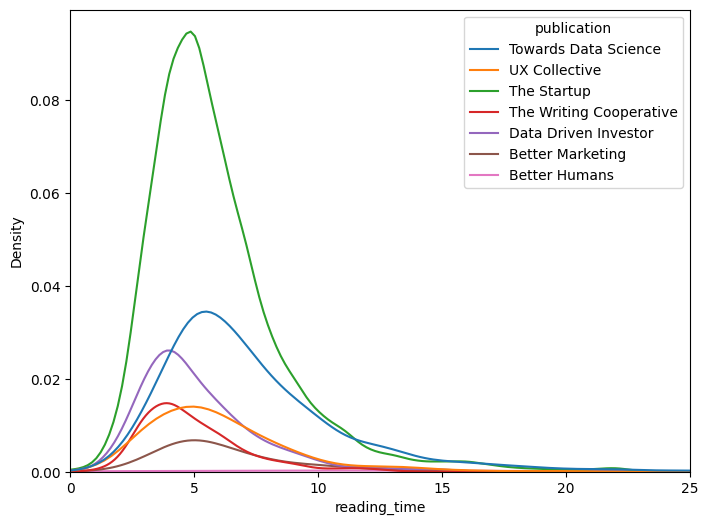

In [141]:
sns.kdeplot(x="reading_time", hue="publication", data=my_data)
plt.xlim(0,25)
plt.show()

From this kde plot we can see that the mean reading time does not differ much between publications.

Finally, to visualize relationship between reponses and claps,we have to first drop the articles that have responses as "Read" and convert the column type to int.

In [142]:
my_data[my_data["responses"]=="Read"]

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
3977,3978,https://medium.com/datadriveninvestor/what-do-...,What do you think of the Open Group’s Data Sci...,NaN,3978.jpg,73,Read,3,Data Driven Investor,2019-05-24
6392,6393,https://uxdesign.cc/please-please-please-tell-...,"UX doesn’t discriminate, it targets behaviours",NaN,NaN,74,Read,5,UX Collective,2019-12-05


In [143]:
my_data.drop(index=[3977, 6392], inplace=True)

In [144]:
my_data["responses"] = my_data["responses"].astype(int)
my_data["responses"].dtype

dtype('int64')

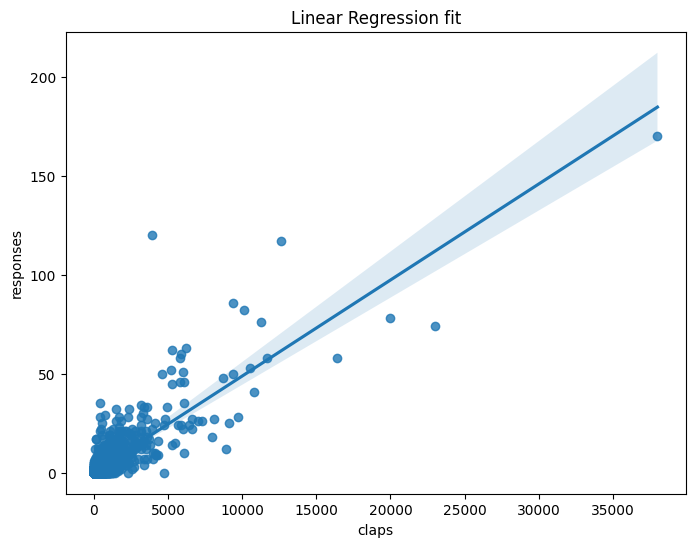

In [145]:
sns.regplot(x="claps", y="responses", data=my_data)
plt.title("Linear Regression fit")
plt.show()

It is obvious that articles with more claps get more responses, we can make sure of that plotting a correlation heatmap.

<ipython-input-146-e4fbec1cb8db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = my_data.corr()


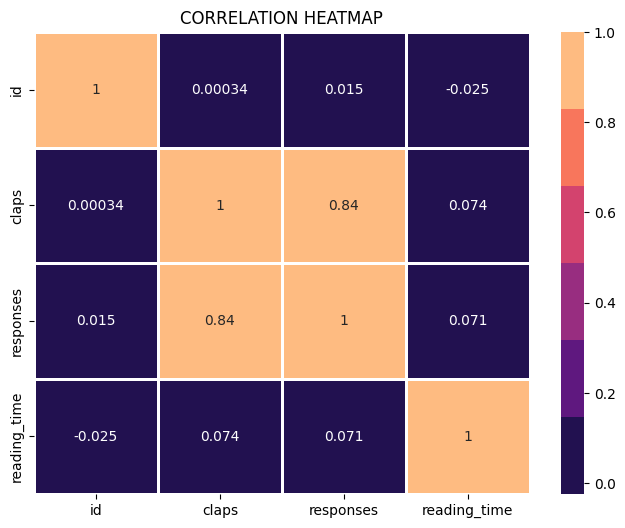

In [146]:
correlation = my_data.corr()
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION HEATMAP")
plt.show()

reponses and claps are positvely correlated. (=0.74)

## Feature Engineering and Data Pre-Processing

converting date column to its correct type:

In [147]:
my_data = my_data.astype({'date': 'datetime64[ns]'})
my_data["date"].dtype

dtype('<M8[ns]')

We have noticed some titles that have html tags attached to them, Let's applying some regex to delete those elements.
Example of a title with html element:

In [148]:
my_data.iloc[1003].title

'<strong class="markup--strong markup--h3-strong">If You Learn to Write, You Can Change Your\xa0Life.</strong>'

In [149]:
def fix_titles(row):
    if re.search("<\w.*?>", row) != None:
        my_data["title"] = my_data["title"].replace("<\w.*?>", "", regex=True)
        my_data["title"] = my_data["title"].replace("</\w.*?>", "", regex=True)
    return row

my_data['title'] = my_data['title'].apply(fix_titles)

Drop columns that won't be use: (not important step)

In [150]:
my_data.drop(columns=["id", "image"], inplace=True)

There are some articles which do not have subtitles, so we will fill these missing subtitles with the title of the article.

In [163]:
my_data["subtitle"].fillna(my_data["title"], inplace=True)

A recommender system would be better if the data contained the whole body, or a summary of it, but since we do not have here, we can combined title and subtitle to form a column that we will apply NMF on.

In [152]:
my_data["article"] = my_data["title"] + my_data["subtitle"]
my_data.head()

,url,title,subtitle,claps,responses,reading_time,publication,date,article
0,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,A Beginner’s Guide to Word Embedding with Gens...,850,8,8,Towards Data Science,2019-05-30,A Beginner’s Guide to Word Embedding with Gens...
1,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,Hands-on Graph Neural Networks with PyTorch & ...,1100,11,9,Towards Data Science,2019-05-30,Hands-on Graph Neural Networks with PyTorch & ...
2,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,767,1,5,Towards Data Science,2019-05-30,How to Use ggplot2 in PythonA Grammar of Graph...
3,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,354,0,4,Towards Data Science,2019-05-30,Databricks: How to Save Files in CSV on Your L...
4,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,211,3,4,Towards Data Science,2019-05-30,A Step-by-Step Implementation of Gradient Desc...


Lets sort data by number of claps.

In [153]:
my_data = my_data.sort_values(by="claps", ascending=False)
my_data

,url,title,subtitle,claps,responses,reading_time,publication,date,article
4552,https://medium.com/swlh/i-have-15-ideas-to-cha...,I Have 15 ideas To Change Your Life. Do you Ha...,I Have 15 ideas To Change Your Life. Do you Ha...,38000,170,5,The Startup,2019-05-20,I Have 15 ideas To Change Your Life. Do you Ha...
1281,https://medium.com/better-marketing/how-to-han...,How To Handle Other People’s Bad Moods Like a Pro,Step 1: Treat difficult emotions like a puzzle...,23000,74,7,Better Marketing,2019-09-11,How To Handle Other People’s Bad Moods Like a ...
1003,https://medium.com/swlh/if-you-learn-to-write-...,"<strong class=""markup--strong markup--h3-stron...",The secret is in the line.,20000,78,6,The Startup,2019-10-14,"<strong class=""markup--strong markup--h3-stron..."
3592,https://medium.com/swlh/how-to-break-a-negativ...,How To Break A Negative Thought Loop,“It’s pretty black-and-white. You either let g...,16400,58,4,The Startup,2019-07-21,How To Break A Negative Thought Loop“It’s pret...
5933,https://writingcooperative.com/10-things-to-do...,10 Things To Do When Medium Doesn’t Curate You...,"When I have a curation gap, I go into my…",12600,117,5,The Writing Cooperative,2019-03-18,10 Things To Do When Medium Doesn’t Curate You...
...,...,...,...,...,...,...,...,...,...
3352,https://medium.com/datadriveninvestor/the-bloc...,The Blockchain Care Act (BCA),The comprehensive decentralized health care re...,0,0,9,Data Driven Investor,2019-03-25,The Blockchain Care Act (BCA)The comprehensive...
1402,https://towardsdatascience.com/teaching-a-comp...,Teaching A Computer To Land On The Moon,Teaching A Computer To Land On The Moon,0,0,3,Towards Data Science,2019-11-09,Teaching A Computer To Land On The MoonTeachin...
3973,https://writingcooperative.com/find-best-fit-b...,Find Best-Fit Book Reviewers (and Deal with th...,Find Best-Fit Book Reviewers (and Deal with th...,0,0,4,The Writing Cooperative,2019-05-24,Find Best-Fit Book Reviewers (and Deal with th...
181,https://medium.com/datadriveninvestor/revisiti...,Revisiting FXI from 2007,"Woulda, coulda, shoulda",0,0,2,Data Driven Investor,2019-05-30,"Revisiting FXI from 2007Woulda, coulda, shoulda"


*Vectorizing* the 'articles' column using **Tf-IDF** vecotizer.

In [154]:
vectorizer = TfidfVectorizer()
articles = vectorizer.fit_transform(my_data["article"])
print(articles.toarray())  # This will print the TF-IDF matrix
print(vectorizer.get_feature_names_out())  # This will print the terms in the matrix

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '000' '002' ... 'zoneand' 'zuckerberg' 'ælf']


## Recommending System Building

Now we can apply NMF on our data and create the recommender. We choose 10 as number of components.

In [155]:
model = NMF(n_components=10, random_state=0)
nmf_features = model.fit_transform(articles)
# model.components_
print(nmf_features)

[[0.00000000e+00 2.93503965e-02 0.00000000e+00 ... 0.00000000e+00
  6.62032425e-02 0.00000000e+00]
 [1.50476596e-04 3.62448307e-02 0.00000000e+00 ... 2.01605829e-02
  0.00000000e+00 3.56721707e-03]
 [1.84462410e-01 1.70335993e-02 4.13237892e-02 ... 2.42823935e-02
  4.31853714e-02 2.13975795e-02]
 ...
 [7.56495046e-05 3.77984280e-03 3.61246181e-02 ... 1.68827512e-03
  3.96737598e-03 5.96043336e-02]
 [2.33742554e-04 3.17460679e-03 1.52140711e-03 ... 3.81780543e-04
  8.18005176e-04 2.03218604e-03]
 [0.00000000e+00 8.62035487e-05 2.11985691e-04 ... 0.00000000e+00
  0.00000000e+00 7.07935036e-04]]


Now we will normalize nmf features to a unit norm.

In [156]:
normalized = normalize(nmf_features)
normalized

array([[0.        , 0.27510746, 0.        , ..., 0.        , 0.62053695,
        0.        ],
       [0.00361452, 0.87061933, 0.        , ..., 0.48426749, 0.        ,
        0.08568637],
       [0.86843213, 0.08019263, 0.19454861, ..., 0.11431928, 0.20331277,
        0.10073784],
       ...,
       [0.00108154, 0.05403937, 0.51646368, ..., 0.0241368 , 0.05672048,
        0.85214668],
       [0.04432215, 0.6019674 , 0.28848848, ..., 0.07239304, 0.15510975,
        0.38534213],
       [0.        , 0.05419454, 0.1332714 , ..., 0.        , 0.        ,
        0.44506539]])

To make it easy to work with the features, lets create a dataframe containing the features, indexed by title of article.

In [157]:
df = pd.DataFrame(data=normalized, index=my_data["title"])

The resulted dataframe:

In [158]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
The myth of visionary leadership,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
After the Empire — TheVampires Return,0.000000,0.008236,0.999614,0.000000,0.000000,0.001850,0.000000,0.026477,0.000000,0.000000
A Design Team is Like an Orchard,0.955803,0.026322,0.000000,0.095636,0.065127,0.000000,0.028602,0.259660,0.035199,0.053664
When Less Data is Enough Data,0.000000,0.000000,0.000000,0.000000,0.859874,0.000000,0.000000,0.510506,0.000000,0.000000
Neuroaesthetics: Understanding Our Perception of Beauty.,0.000000,0.000000,0.995856,0.040389,0.000000,0.000000,0.013154,0.024104,0.000000,0.076718
Mitigation of Climate Change with Machine Learning,0.001033,0.000000,0.308474,0.000000,0.000000,0.000000,0.749193,0.000000,0.007043,0.586090
Debugging your tensorflow code right (without so many painful mistakes),0.000000,0.047963,0.062396,0.000000,0.000000,0.035934,0.026597,0.064264,0.988888,0.098884
Why Git and Git-LFS is not enough to solve the Machine Learning Reproducibility crisis,0.000000,0.148422,0.132554,0.000000,0.000000,0.000000,0.850626,0.466777,0.000000,0.137679
How to use Test Driven Development in a Data Science Workflow,0.000000,0.233076,0.000000,0.000000,0.902720,0.000000,0.000000,0.000000,0.000000,0.361625


## Testing  the system

Now lets say if we are currently reading "Will AI steal UX/UI designers’ job?" article, which articles will the recommender suggest?

In [159]:
current = df.loc["Will AI steal UX/UI designers’ job?"]
current

0    0.001311
1    0.000000
2    0.372555
3    0.038256
4    0.000000
5    0.019070
6    0.828303
7    0.000000
8    0.000000
9    0.416279
Name: Will AI steal UX/UI designers’ job?, dtype: float64

Calculate similarites using Cosine Similarity.

In [160]:
similarities = df.dot(current)
similarities

title
I Have 15 ideas To Change Your Life. Do you Have 5 Minutes?                                                   0.014004
How To Handle Other People’s Bad Moods Like a Pro                                                             0.035917
<strong class="markup--strong markup--h3-strong">If You Learn to Write, You Can Change Your Life.</strong>    0.122612
How To Break A Negative Thought Loop                                                                          0.137757
10 Things To Do When Medium Doesn’t Curate Your Articles                                                      0.049973
                                                                                                                ...   
The Blockchain Care Act (BCA)                                                                                 0.331071
Teaching A Computer To Land On The Moon                                                                       0.365653
Find Best-Fit Book Reviewers (and Deal wit

We will merge the original dataframe with the resulted dataframe in order to sort by number of claps.

In [161]:
sims = pd.DataFrame(similarities.nlargest(10))
sims = sims.merge(my_data[["title", "claps"]], how='inner', on="title")
sims.set_index("title", drop=True, inplace=True)
sims.sort_values(by="claps", ascending=False).head()

,0,claps
title,,
Live Prediction of Traffic Accident Risks Using Machine Learning and Google Maps,0.983473,716
How Machine Learning Made Me Fall in Love with the WNBA,0.993988,304
Will AI steal UX/UI designers’ job?,1.000000,218
Predicting Unknown Unknowns,0.997006,142
"On Value Functions, Theory of Life and Bellmann Equation Gymnastics",0.996322,61
